# 2D Poisson Equation
$$\dfrac{\partial^2 u}{ \partial x^2} + \dfrac{\partial^2 u}{ \partial y^2} =f, \quad (x,y) \in [0, 1] \times [0, 1]$$

$$f=4$$

$$u_\Gamma = g(x,y)$$

## Domain Discretisation

<!-- ![2d mesh](image/2dmesh.png) -->

Divide the domain uniformlly into $M_x\times M_y$ parts by using $N_x\times N_y$ points, $N_x=M_x+1$, $N_y=N_y+1$, so the step size is
$$h_x = \dfrac{1}{M_x}, \quad h_y = \dfrac{1}{M_y}$$

the coordinates of the points are

$$x(i,:)=(i-1)h_x, \quad i=1,2,\ldots,N_x$$
$$y(:,j)=(j-1)h_y, \quad j=1,2,\ldots,N_y$$

boundary condition

$$u[1,:]=g(0,:), \quad u[N,:]=g(1,:)$$
$$u[:,1]=g(:,0), \quad u[:,N]=g(:,1)$$

## Equation Discretisation

At point $(i, j)$,

$$\dfrac{u_{i-1, j}-2u_{i, j}+u_{i+1,j}}{h_x^2}+\dfrac{u_{i, j-1}-2u_{i, j}+u_{i,j+1}}{h_y^2}=f_{i, j}$$

If $h_x=h_y=h$

$$u_{i-1, j}+u_{i,j-1}-4u_{i}+u_{i+1,j}+u_{i,j+1}=h^2 f_{i,j}$$

### Point Iteration Method

A point iteration can be used to find $u_i$ as

$$ u_{i} = \frac{1}{4} \Bigl( u_{i-1, j}+u_{i,j-1}+u_{i+1,j}+u_{i,j+1} - h^2 f_{i,j} \Bigr)$$

### Linear Algebra Method

Supposing $N=4$, write down all the 9 equations (at mesh points):

$u_1=g(x_1, y_1)$

$u_2 = g(x_2, y_2)$

$u_3 = g(x_3, y_3)$

$u_4 = g(x_4, y_4)$

$u_5 = g(x_5, y_5)$

$u_2 + u_5 - 4 u_6 + u_7 + u_8 = h^2 f_6$

$u_3 + u_6 - 4 u_7 + u_8 + u_9 = h^2 f_7$

$u_8 = g(x_8, y_8)$

$u_9 = g(x_9, y_9)$

$u_6 + u_9 - 4 u_{10} + u_{11} + u_{14} = h^2 f_{10}$

$u_7 + u_{10} - 4 u_{11} + u_{12} + u_{15} = h^2 f_{11}$

$u_{13}=g(x_{13}, y_{13})$

$u_{14}=g(x_{14}, y_{14})$

$u_{15}=g(x_{15}, y_{15})$

$u_{16}=g(x_{16}, y_{16})$

Assemble these equations into a linear system $Au=r$

$$
\begin{bmatrix}
1 &  0 & 0\\
0 &  1 &  0 & 0\\
0 &  0 &  1 & 0  & 0\\
0 &  0 &  0 &  1 &  0 & 0   \\
0 &  0 &  0 &  0 &  1 & 0  & 0\\
0 &  1 &  0 &  0 &  1 & -4 &  1 & 0 &  0  & 1 \\
0 &  0 &  1 &  0 &  0 &  1 & -4 & 1 &  0  & 0  &  1 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 1 &  0  & 0 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 0 &  1  & 0  &  0 \\
0 &  0 &  0 &  0 &  0 &  1 &  0 & 0 &  1  & -4 &  1  & 0 & 0 & 1 \\
0 &  0 &  0 &  0 &  0 &  0 &  1 & 0 &  0  &  1 & -4  & 1 & 0 & 0 & 1 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 0 &  0  &  0 &  0  & 1 & 0 & 0 & 0 & 0 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 0 &  0  &  0 &  0  & 0 & 1 & 0 & 0 & 0 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 0 &  0  &  0 &  0  & 0 & 0 & 1 & 0 & 0 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 0 &  0  &  0 &  0  & 0 & 0 & 0 & 1 & 0 \\
0 &  0 &  0 &  0 &  0 &  0 &  0 & 0 &  0  &  0 &  0  & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4 \\
u_5 \\
u_6 \\
u_7 \\
u_8 \\
u_9 \\
u_{10} \\
u_{11} \\
u_{12} \\
u_{13} \\
u_{14} \\
u_{15} \\
u_{16} \\
\end{bmatrix}
=
\begin{bmatrix}
u_{1} \\
u_2 \\
u_3 \\
u_4 \\
u_5 \\
h^2 f_6 \\
h^2 f_7 \\
u_8 \\
u_9 \\
h^2 f_{10} \\
h^2 f_{11} \\
u_{12} \\
u_{13} \\
u_{14} \\
u_{15} \\
u_{16} \\
\end{bmatrix}
$$

## Python Code for Linear Algebra Method

### Import python libraries

In [1]:
# %pylab inline
import math
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import scipy as sp
import scipy.sparse as sparse
import scipy.sparse.linalg as sLA

### Define mesh and initial numerical & exact solutions

In [2]:
#Domain Length
Lx=1.0
Ly=1.0

#Number of cells in x and y directions
Mx=int(50)
My=int(50)

#Number of points in x and y directions
Nx=Mx+1
Ny=My+1

#Number of total points
N=Nx*Ny

#step size
hx=Lx/Mx
hy=Ly/My

#mesh points
x1d=np.arange(0,Lx+hx,hx)
y1d=np.arange(0,Ly+hy,hy)

x,y=np.meshgrid(x1d,y1d)

print('x:',x)
print('y:',y)

#exact solution: ue=x^2
ue=np.power(x,2)+np.power(y,2)

print("ue:", ue)

#source term: f
f=np.ones((Ny,Nx))*4

print("f:",f)

#numerical solution: u
u=np.zeros((Ny,Nx))

##boundary condition
u[0,:]=ue[0,:]
u[-1,:]=ue[-1,:]
u[:,0]=ue[:,0]
u[:,-1]=ue[:,-1]

print("u:", u)



x: [[0.   0.02 0.04 ... 0.96 0.98 1.  ]
 [0.   0.02 0.04 ... 0.96 0.98 1.  ]
 [0.   0.02 0.04 ... 0.96 0.98 1.  ]
 ...
 [0.   0.02 0.04 ... 0.96 0.98 1.  ]
 [0.   0.02 0.04 ... 0.96 0.98 1.  ]
 [0.   0.02 0.04 ... 0.96 0.98 1.  ]]
y: [[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [0.96 0.96 0.96 ... 0.96 0.96 0.96]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [1.   1.   1.   ... 1.   1.   1.  ]]
ue: [[0.0000e+00 4.0000e-04 1.6000e-03 ... 9.2160e-01 9.6040e-01 1.0000e+00]
 [4.0000e-04 8.0000e-04 2.0000e-03 ... 9.2200e-01 9.6080e-01 1.0004e+00]
 [1.6000e-03 2.0000e-03 3.2000e-03 ... 9.2320e-01 9.6200e-01 1.0016e+00]
 ...
 [9.2160e-01 9.2200e-01 9.2320e-01 ... 1.8432e+00 1.8820e+00 1.9216e+00]
 [9.6040e-01 9.6080e-01 9.6200e-01 ... 1.8820e+00 1.9208e+00 1.9604e+00]
 [1.0000e+00 1.0004e+00 1.0016e+00 ... 1.9216e+00 1.9604e+00 2.0000e+00]]
f: [[4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 ...
 [4. 4.

### Assemble the right hand side of $Au=r$

In [3]:
##assemble the right hand side: r
r=np.zeros((Ny,Nx))

##boundary condition
r[0,:]=ue[0,:]
r[-1,:]=ue[-1,:]
r[:,0]=ue[:,0]
r[:,-1]=ue[:,-1]


for j in range(1,Ny-1):
    for i in range(1,Nx-1):        
        r[j,i]=f[j,i]

print("r:", r)

#reshape r
r1d=np.reshape(r,(N))

print('r1d:',r1d)

#reshape ue
ue1d=np.reshape(ue,(N))


r: [[0.0000e+00 4.0000e-04 1.6000e-03 ... 9.2160e-01 9.6040e-01 1.0000e+00]
 [4.0000e-04 4.0000e+00 4.0000e+00 ... 4.0000e+00 4.0000e+00 1.0004e+00]
 [1.6000e-03 4.0000e+00 4.0000e+00 ... 4.0000e+00 4.0000e+00 1.0016e+00]
 ...
 [9.2160e-01 4.0000e+00 4.0000e+00 ... 4.0000e+00 4.0000e+00 1.9216e+00]
 [9.6040e-01 4.0000e+00 4.0000e+00 ... 4.0000e+00 4.0000e+00 1.9604e+00]
 [1.0000e+00 1.0004e+00 1.0016e+00 ... 1.9216e+00 1.9604e+00 2.0000e+00]]
r1d: [0.0000e+00 4.0000e-04 1.6000e-03 ... 1.9216e+00 1.9604e+00 2.0000e+00]


#### Assemble the sparse matrix in COO format

In [4]:
#number of non-zero elements in the sparse matrix A
NNZ=Nx*Ny-(Nx-2)*(Ny-2)+(Nx-2)*(Ny-2)*5
print("NNZ=",NNZ)

# I & J indices
Idx=np.zeros(NNZ,dtype=int)
Jdx=np.zeros(NNZ,dtype=int)

#non-zero elements in the matrix 
vals=np.zeros(NNZ,dtype=float)

counter=-1
for j in range(Ny):
    for i in range(Nx):
        k=j*Nx+i

        if(i==0 or i==Nx-1 or j==0 or j==Ny-1):
            counter=counter+1
            Idx[counter]=k
            Jdx[counter]=k
            vals[counter]=1
        else:
            #bottom
            counter=counter+1
            Idx[counter]=k
            Jdx[counter]=k-Nx
            vals[counter]=1/hy/hy

            #left
            counter=counter+1
            Idx[counter]=k
            Jdx[counter]=k-1
            vals[counter]=1/hx/hx

            #center
            counter=counter+1
            Idx[counter]=k
            Jdx[counter]=k
            vals[counter]=-2/hx/hx-2/hy/hy

            #right
            counter=counter+1
            Idx[counter]=k
            Jdx[counter]=k+1
            vals[counter]=1/hx/hx

            #top
            counter=counter+1
            Idx[counter]=k
            Jdx[counter]=k+Nx
            vals[counter]=1/hy/hy

print("Idx:", Idx)
print("Jdx:", Jdx)
print("vals:",vals)

Acoo=sparse.coo_matrix((vals,(Idx,Jdx)),shape=(N,N))

print(Acoo.toarray())
# print(" ")
# print(A-Acoo.toarray())

#Convert COO format to CSR format
Acsr=Acoo.tocsr()


NNZ= 12205
Idx: [   0    1    2 ... 2598 2599 2600]
Jdx: [   0    1    2 ... 2598 2599 2600]
vals: [1. 1. 1. ... 1. 1. 1.]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Solve the sparse linear system Au=r

error2= 1.0519455043989122e-13
error3= 2.364959521728554e-11


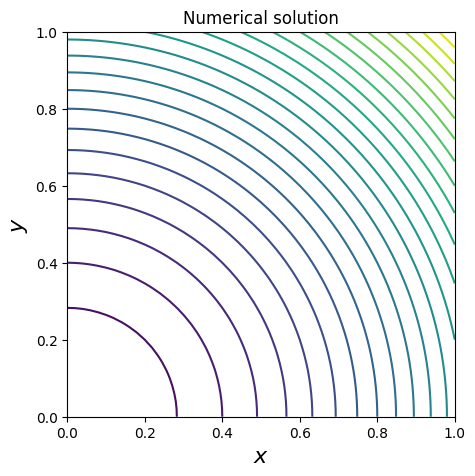

In [5]:
u2_1d=sLA.spsolve(Acsr,r1d)
u2=np.reshape(u2_1d,(Ny,Nx))
error2=LA.norm(u2-ue)

u3_1d=sLA.spsolve(Acoo.tocsc(),r1d)
u3=np.reshape(u3_1d,(Ny,Nx))
error3=LA.norm(u3-ue)

# print("ue=",ue)
# print("u2=",u2)
# print("u3=",u3)
print("error2=",error2)
print("error3=",error3)

# #plot solutions
plt.figure(1,figsize=(5,5))
plt.contour(y,x,u2,30)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.title("Numerical solution")
plt.show()

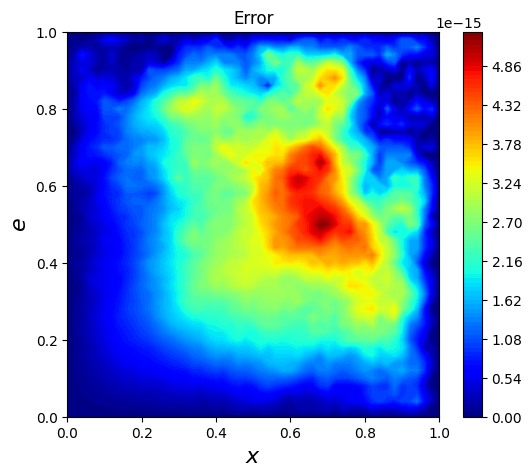

In [6]:
# #plot error
plt.figure(1,figsize=(6,5))
plt.contourf(y,x,abs(u2-ue),100,cmap=plt.cm.jet)
# plt.plot(x,y)
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$e$', fontsize=16)
plt.title("Error")
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Mesh')

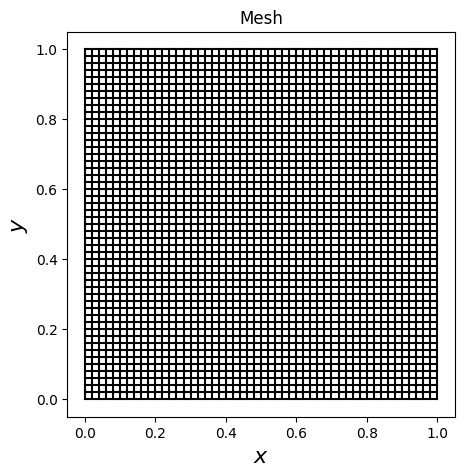

In [7]:
plt.figure(figsize=(5,5))
plt.plot(x, y,c='k') # use plot, not scatter
plt.plot(np.transpose(x), np.transpose(y),c='k') # add this here
plt.xlabel(r'$x$', fontsize=16)
plt.ylabel(r'$y$', fontsize=16)
plt.title("Mesh")